In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dim_products = pd.read_csv('../datasets/gold/dim_products.csv')
fct_ordenes = pd.read_csv('../datasets/gold/fct_ordenes.csv')

In [3]:
fct_ordenes.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1515936,183418,11,6,13,30.0,22035,13.0,0
1,1515936,183418,11,6,13,30.0,21903,6.0,1
2,1515936,183418,11,6,13,30.0,19048,1.0,1
3,1515936,183418,11,6,13,30.0,47766,3.0,1
4,1515936,183418,11,6,13,30.0,45066,9.0,0


In [4]:
ventas_por_dia = fct_ordenes.groupby('order_dow')['order_id'].nunique()

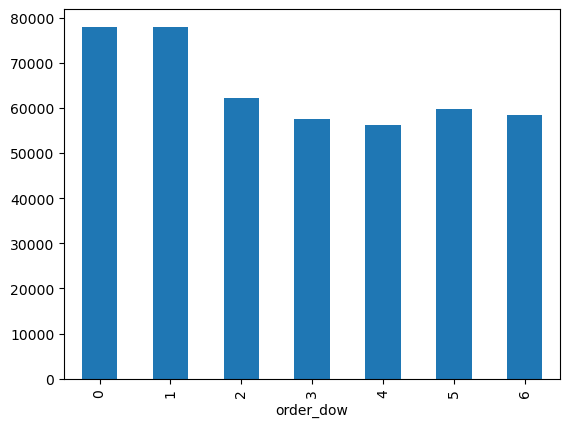

In [5]:
ventas_por_dia.plot(kind='bar')
plt.show()

In [6]:
ventas_por_hora = fct_ordenes.groupby('order_hour_of_day')['order_id'].nunique()
ventas_por_hora

order_hour_of_day
0      2978
1      1646
2       938
3       713
4       716
5      1288
6      3973
7     12276
8     23689
9     33940
10    38236
11    37681
12    35769
13    36596
14    37171
15    37308
16    35847
17    29843
18    23817
19    18306
20    13737
21    10354
22     7966
23     5258
Name: order_id, dtype: int64

<Axes: title={'center': 'Ordenes por hora del dia'}, xlabel='Hora del dia', ylabel='Numero de Ordenes'>

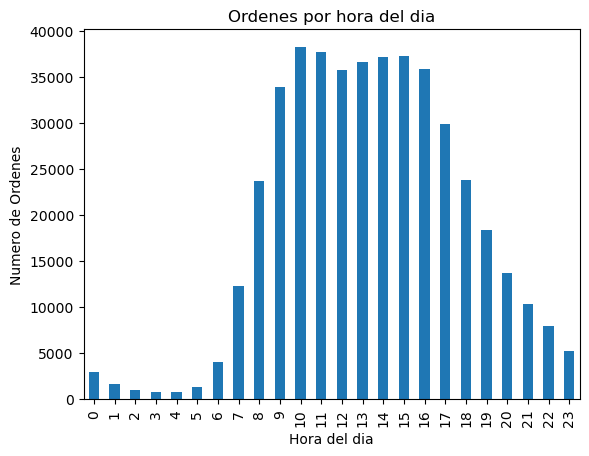

In [7]:
ventas_por_hora.plot(
    kind='bar',
    title='Ordenes por hora del dia',
    xlabel='Hora del dia',
    ylabel='Numero de Ordenes'
)

In [61]:
filtro_ventas_domingo = fct_ordenes['order_dow'] == 0
filtro_ventas_lunes = fct_ordenes['order_dow'] == 1

In [62]:
ordenes_domingo_por_hora = fct_ordenes[filtro_ventas_domingo].groupby('order_hour_of_day')['order_id'].nunique()
ordenes_lunes_por_hora = fct_ordenes[filtro_ventas_lunes].groupby('order_hour_of_day')['order_id'].nunique()


<Axes: xlabel='order_hour_of_day'>

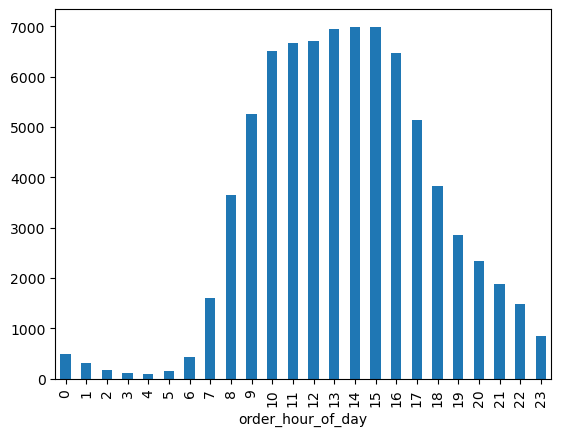

In [63]:
ordenes_domingo_por_hora.plot(kind='bar')

<Axes: xlabel='order_hour_of_day'>

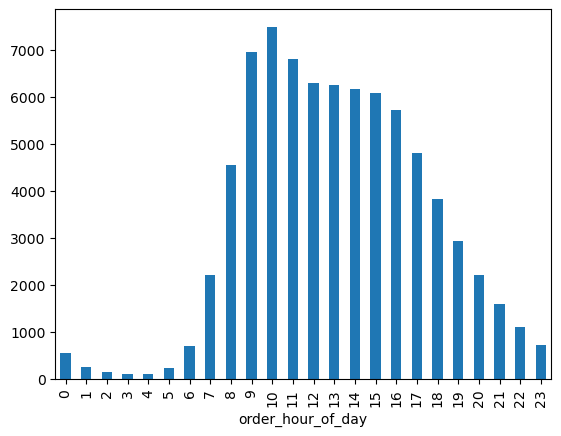

In [ ]:
ordenes_lunes_por_hora.plot(kind='bar')

In [64]:
ordenes_miercoles_y_sabado_x_hora = pd.concat([ordenes_domingo_por_hora, ordenes_lunes_por_hora], axis=1)

In [65]:
ordenes_miercoles_y_sabado_x_hora.columns = ['ordenes_domingo', 'ordenes_lunes']

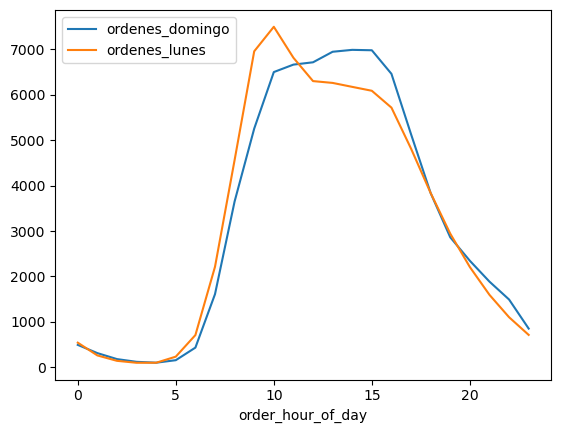

In [66]:
ordenes_miercoles_y_sabado_x_hora.plot(kind='line')
plt.show()

In [19]:
ordenes_obt = fct_ordenes.merge(dim_products, how='inner', on = 'product_id')

In [20]:
ordenes_obt

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,product_name_upper,aisle,nombre_pasillo,department,nombre_departamento
0,1515936,183418,11,6,13,30.0,22035,13.0,0,Organic Whole String Cheese,21,16,ORGANIC WHOLE STRING CHEESE,packaged cheese,PACKAGED CHEESE,dairy eggs,DAIRY EGGS
1,60724,110808,78,0,10,2.0,22035,7.0,1,Organic Whole String Cheese,21,16,ORGANIC WHOLE STRING CHEESE,packaged cheese,PACKAGED CHEESE,dairy eggs,DAIRY EGGS
2,271708,66907,6,5,13,30.0,22035,3.0,1,Organic Whole String Cheese,21,16,ORGANIC WHOLE STRING CHEESE,packaged cheese,PACKAGED CHEESE,dairy eggs,DAIRY EGGS
3,76263,176583,49,5,12,3.0,22035,9.0,1,Organic Whole String Cheese,21,16,ORGANIC WHOLE STRING CHEESE,packaged cheese,PACKAGED CHEESE,dairy eggs,DAIRY EGGS
4,1790641,126980,59,5,16,5.0,22035,6.0,1,Organic Whole String Cheese,21,16,ORGANIC WHOLE STRING CHEESE,packaged cheese,PACKAGED CHEESE,dairy eggs,DAIRY EGGS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4545002,724656,148196,8,1,12,6.0,17942,35.0,1,Steamables Golden Potatoes,83,4,STEAMABLES GOLDEN POTATOES,fresh vegetables,FRESH VEGETABLES,produce,PRODUCE
4545003,494864,27698,10,3,22,30.0,39288,12.0,1,Chicken Strips,49,12,CHICKEN STRIPS,packaged poultry,PACKAGED POULTRY,meat seafood,MEAT SEAFOOD
4545004,1537077,20022,1,1,12,-1.0,22976,11.0,0,Jacked Ranch Hot Chips,107,19,JACKED RANCH HOT CHIPS,chips pretzels,CHIPS PRETZELS,snacks,SNACKS
4545005,3215753,16884,21,6,8,3.0,34081,1.0,1,Peach Black Tea,94,7,PEACH BLACK TEA,tea,TEA,beverages,BEVERAGES


In [21]:
ordenes_por_producto = ordenes_obt.groupby(['product_id', 'product_name_upper'])['order_id'].nunique().sort_values(ascending=False)

In [22]:
top_20_productos = ordenes_por_producto.head(20)

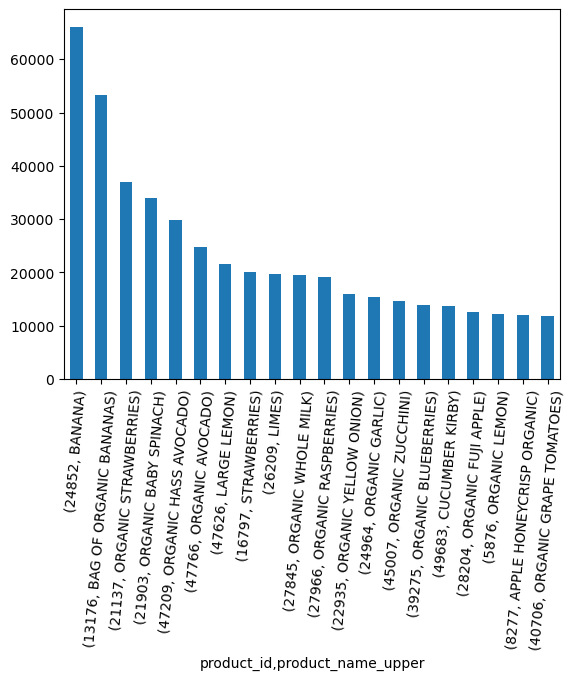

In [30]:
top_20_productos.plot(kind='bar')
plt.xticks(rotation=85)
plt.show()

In [31]:
filtro_primer_producto = ordenes_obt['add_to_cart_order'] == 1

In [33]:
ordenes_por_primer_producto = ordenes_obt[filtro_primer_producto].groupby(['product_id', 'product_name_upper'])['order_id'].nunique().sort_values(ascending=False)

In [34]:
top_20_productos_primeros = ordenes_por_primer_producto.head(20)

<Axes: xlabel='product_id,product_name_upper'>

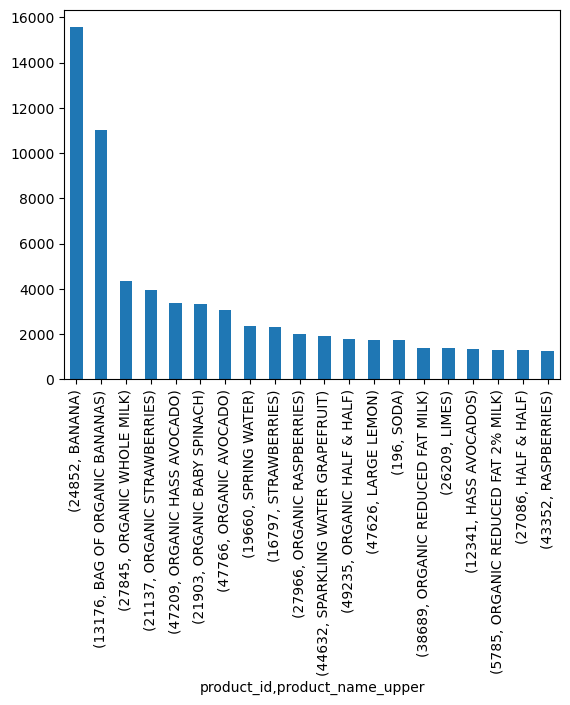

In [35]:
top_20_productos_primeros.plot(kind='bar')

In [43]:
reordenes_por_producto = ordenes_obt.groupby(['product_id', 'product_name_upper']).agg({
    'reordered': 'mean',
    'order_id': 'nunique',
    'user_id': 'nunique'
}).sort_values('reordered', ascending=False)

In [ ]:

reordenes_por_producto.columns = ['ratio_reorden', 'num_ordenes', 'num_clientes']

In [53]:
reordenes_por_producto.query('ratio_reorden < 1.0 and ratio_reorden > 0.8').sort_values('num_clientes', ascending=False)


,,ratio_reorden,num_ordenes,num_clientes
product_id,product_name_upper,,,
24852,BANANA,0.844254,66050,33274
13176,BAG OF ORGANIC BANANAS,0.834006,53297,27636
27845,ORGANIC WHOLE MILK,0.829133,19600,9874
19660,SPRING WATER,0.810814,7675,4058
5785,ORGANIC REDUCED FAT 2% MILK,0.805727,6635,3551
...,...,...,...,...
10643,WHITE CAKE ICING,0.857143,7,1
31949,TROPICAL TURMERIC JUN-KOMBUCHA MADE WITH HONEY ORGANIC,0.875000,8,1
8879,SURFER BATH SOAK,0.857143,7,1
